In [16]:
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import sys
import tensorflow as tf

sys.path.append('../')
from libs.datasets import MNIST
from libs import utils
from tensorflow.python.framework.ops import reset_default_graph

%matplotlib inline

plt.rcParams['figure.figsize'] = [16, 9]
plt.style.use('ggplot')

## Fully-Connected Classification Network

In [27]:
ds = MNIST(split=[0.8, 0.1, 0.1])

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


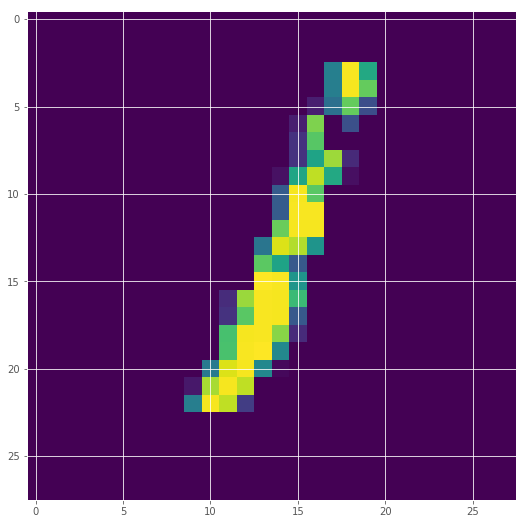

In [28]:
print(ds.Y[0])
plt.imshow(np.reshape(ds.X[0], [28, 28]));

In [29]:
print(ds.X.shape)
print(ds.Y.shape)

(70000, 784)
(70000, 10)


In [30]:
n_input = 28 * 28 # 784 px per image
n_output = 10 # classes of digits

In [34]:
reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_output])

In [35]:
Y_pred, W = utils.linear(x=X, 
                         n_output=n_output, 
                         activation=tf.nn.softmax,
                         name='layer1')

In [36]:
ETA = 0.001
cross_entropy = -tf.reduce_sum(Y * tf.log(Y_pred + 1e-12)) # prevent log(0)
optimizer = tf.train.AdamOptimizer(ETA).minimize(cross_entropy)

In [37]:
predicted_y = tf.argmax(Y_pred, 1) # (input, axis)
actual_y = tf.argmax(Y, 1)

In [38]:
correct_prediction = tf.equal(predicted_y, actual_y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
# Note: reduce_mean reduces over entire batch

### Run the Network

In [48]:
s = tf.Session()
s.run(tf.global_variables_initializer())

batch_size = 50
n_epochs = 10

for epoch in range(n_epochs):
    for batch_xs, batch_ys in ds.train.next_batch():
        s.run(optimizer, feed_dict={X: batch_xs, Y: batch_ys})
    valid = ds.valid # validation set
    print(s.run(accuracy, feed_dict={X: valid.images, Y: valid.labels}))
    
# Final accuracy
test = ds.test # test set
print(s.run(accuracy, feed_dict={X: test.images, Y: test.labels}))

0.890143
0.904
0.909571
0.911286
0.916
0.915571
0.918
0.917571
0.917857
0.919286
0.924714


### Inspect the Trained Network

In [49]:
g = tf.get_default_graph()
[op.name for op in g.get_operations()]

['Placeholder',
 'Placeholder_1',
 'layer1/W/Initializer/random_uniform/shape',
 'layer1/W/Initializer/random_uniform/min',
 'layer1/W/Initializer/random_uniform/max',
 'layer1/W/Initializer/random_uniform/RandomUniform',
 'layer1/W/Initializer/random_uniform/sub',
 'layer1/W/Initializer/random_uniform/mul',
 'layer1/W/Initializer/random_uniform',
 'layer1/W',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b/Initializer/Const',
 'layer1/b',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/h',
 'layer1/Softmax',
 'add/y',
 'add',
 'Log',
 'mul',
 'Const',
 'Sum',
 'Neg',
 'gradients/Shape',
 'gradients/Const',
 'gradients/Fill',
 'gradients/Neg_grad/Neg',
 'gradients/Sum_grad/Reshape/shape',
 'gradients/Sum_grad/Reshape',
 'gradients/Sum_grad/Shape',
 'gradients/Sum_grad/Tile',
 'gradients/mul_grad/Shape',
 'gradients/mul_grad/Shape_1',
 'gradients/mul_grad/BroadcastGradientArgs',
 'gradients/mul_grad/mul',
 'gradients/mul_grad/Sum',
 'gradients/mul_grad/Reshape',
 'grad

In [50]:
W = g.get_tensor_by_name('layer1/W:0')
W_arr = np.array(W.eval(session=s))
print(W_arr.shape)

(784, 10)


### Visualize each neuron 
(= every column of the matrix)

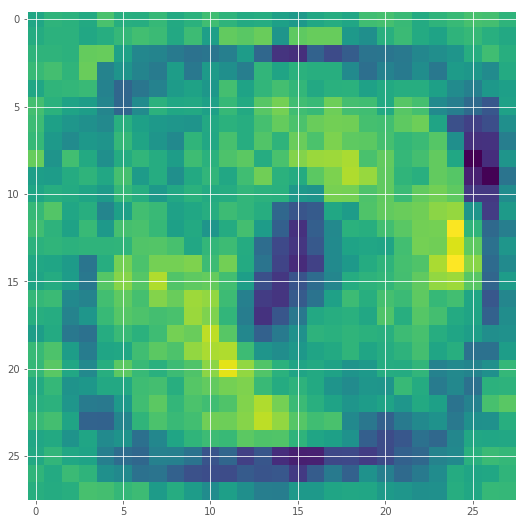

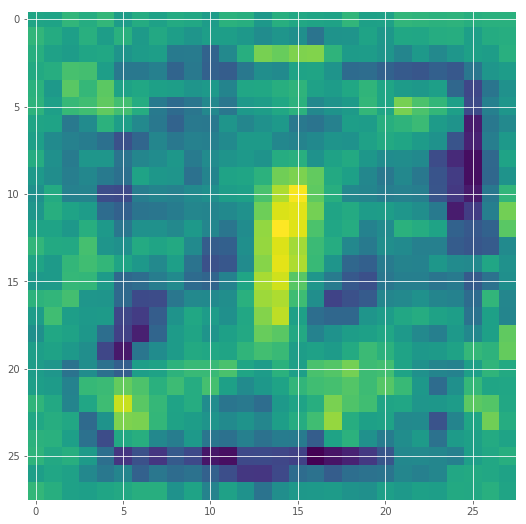

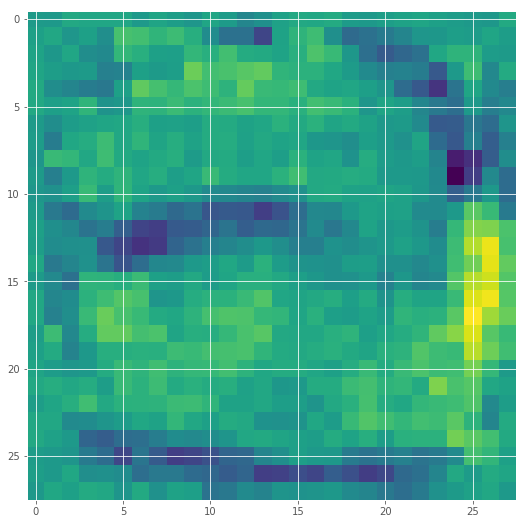

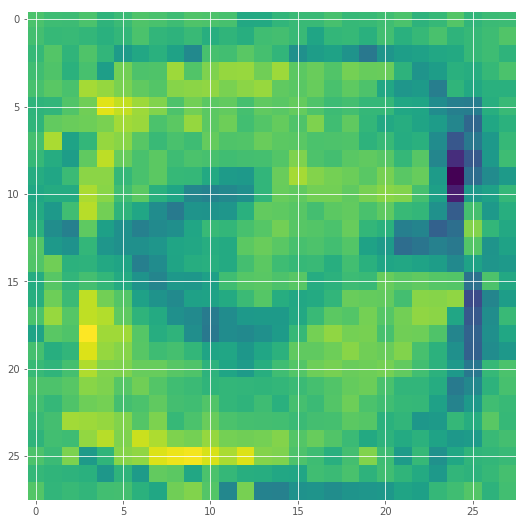

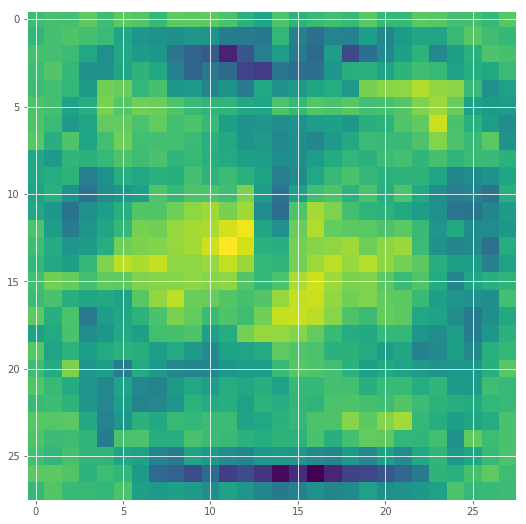

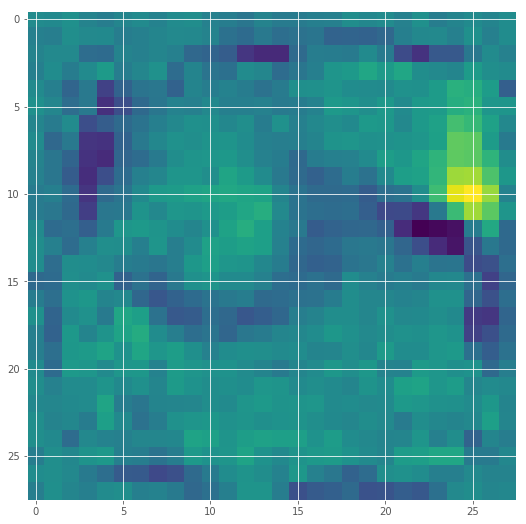

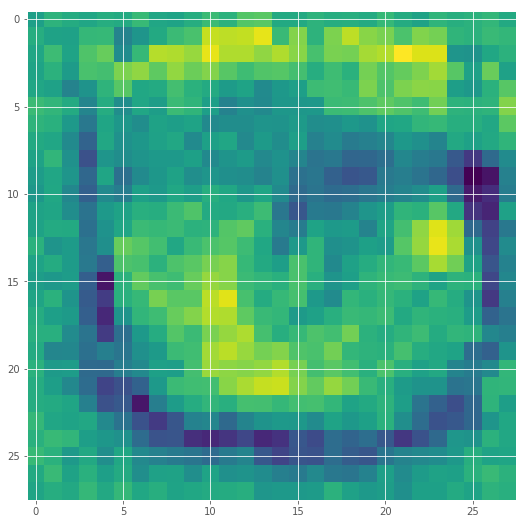

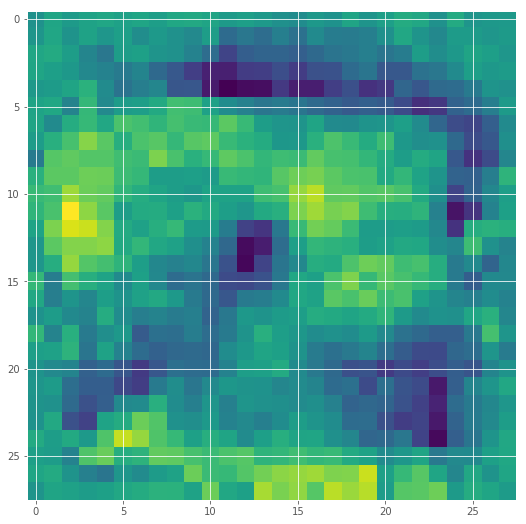

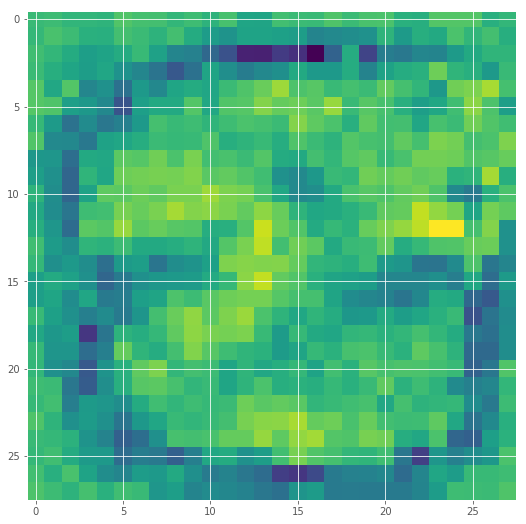

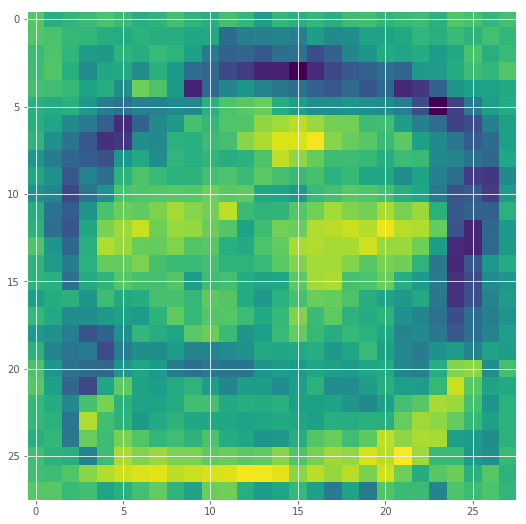

In [51]:
for col in range(10):
    plt.figure();
    plt.imshow(W_arr[:, col].reshape((28, 28)))#, cmap='coolwarm')